In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [243]:
data = pd.read_csv('open_ave_data.csv')
data

,Unnamed: 0,ReportText,findings,clinicaldata,ExamName,impression
0,0,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Cough. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,IMPRESSION: Normal 2-view chest radiography.
1,1,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,IMPRESSION: No acute cardiopulmonary abnormali...
2,2,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,IMPRESSION: No acute cardiopulmonary process.
3,3,Exam: - CHEST-PORTABLE History: Chest pain Com...,Findings: Heart size appears normal. Lungs cle...,History: Chest pain \n\n,Exam: - CHEST-PORTABLE\n\nComparison: None,Impression: Lungs clear
4,4,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,"CLINICAL HISTORY: CHEST PAIN, SHORTNESS OF BRE...",EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,IMPRESSION: Normal single view chest.
...,...,...,...,...,...,...
949,982,CHEST RADIOGRAPH: PA and Lateral views HISTORY...,LUNGS: The lung fields demonstrate normal degr...,HISTORY: R05 Cough \n\n,CHEST RADIOGRAPH: PA and Lateral views\n\nCOMP...,IMPRESSION: No acute pulmonary disease.
950,983,EXAM DESCRIPTION: X-ray single view chest. CLI...,FINDINGS: The lungs are well expanded and are ...,"CLINICAL HISTORY: 68 years Male, SOB \n\n",EXAM DESCRIPTION: X-ray single view chest.\n\n...,IMPRESSION: No evidence of acute intrathoracic...
951,984,EXAM: CHEST RADIOGRAPHY EXAM DATE: 04/02/2018 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Chest pain. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 04/02/2018 ...,IMPRESSION: Normal single view chest.
952,985,EXAM: XR CHEST 1 VW HISTORY: chest pain TECHNI...,FINDINGS: Lines and tubes: None Cardiomediasti...,HISTORY: chest pain \n\n,EXAM: XR CHEST 1 VW\n\nTECHNIQUE: Chest AP vie...,IMPRESSION: No acute cardiopulmonary process D...


Histograms of character length for each of the four report fields

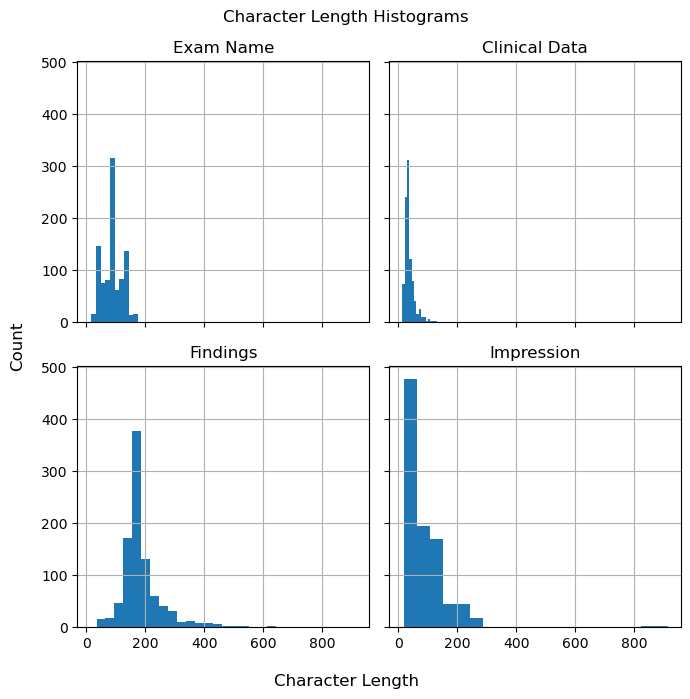

In [244]:
fig, axs = plt.subplots(2,2,figsize=(7,7),sharex=True, sharey=True)

data['ExamName'].str.len().hist(ax=axs[0,0],bins=20)
axs[0, 0].set_title("Exam Name")

data['clinicaldata'].str.len().hist(ax=axs[0,1],bins=20)
axs[0, 1].set_title("Clinical Data")

data['findings'].str.len().hist(ax=axs[1,0],bins=20)
axs[1, 0].set_title("Findings")

data['impression'].str.len().hist(ax=axs[1,1],bins=20)
axs[1, 1].set_title("Impression")

fig.supxlabel('Character Length')
fig.supylabel('Count')
plt.suptitle('Character Length Histograms')
plt.tight_layout()

According to the graphs, exam name and clinical data show the least spread, meaning that their fields' character lengths are more similar than those of findings and impressions. Exam Name is comprised of strings with around 100+ characters, while clinical data strings are often less than 100 characters. Findings and impressions have greater spread, with findings having the greatest amount of characters on average compared to the other fields. Most impressions are fewer than 200 characters, with some strings being greater (note few outliers with more than 800 characters).

Histograms of number of words in each field

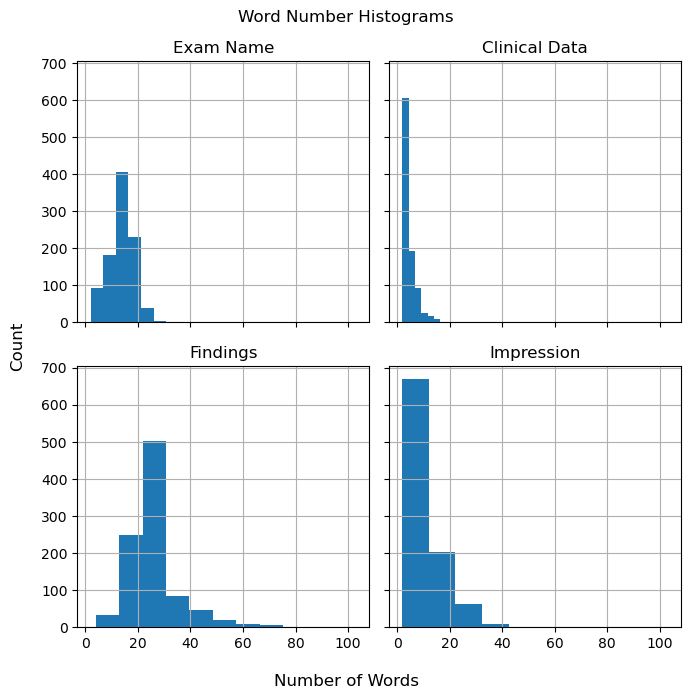

In [245]:
fig, axs = plt.subplots(2,2,figsize=(7,7),sharex=True, sharey=True)

data['ExamName'].str.split().map(lambda x: len(x)).hist(ax=axs[0,0])
axs[0, 0].set_title("Exam Name")

#must dropna here because 4 records are missing/NaN
data['clinicaldata'].dropna().str.split().map(lambda x: len(x)).hist(ax=axs[0,1])
axs[0, 1].set_title("Clinical Data")

data['findings'].str.split().map(lambda x: len(x)).hist(ax=axs[1,0])
axs[1, 0].set_title("Findings")

data['impression'].str.split().map(lambda x: len(x)).hist(ax=axs[1,1])
axs[1, 1].set_title("Impression")

fig.supxlabel('Number of Words')
fig.supylabel('Count')
plt.suptitle('Word Number Histograms')
plt.tight_layout()

The findings field has the greatest spread, and thus the greatest variation in number of words. This corresponds to the variation in character length seen in the character length histograms. The average word count for findings is around 20-30 words. On the other hand, the exam name field is largely less than 20 words on average. Clinical Data is a short field with most examples being fewer than 10 words. The impression field is mostly less than 20 words, with the majority of examples being less than 15 words.

Average word length histograms

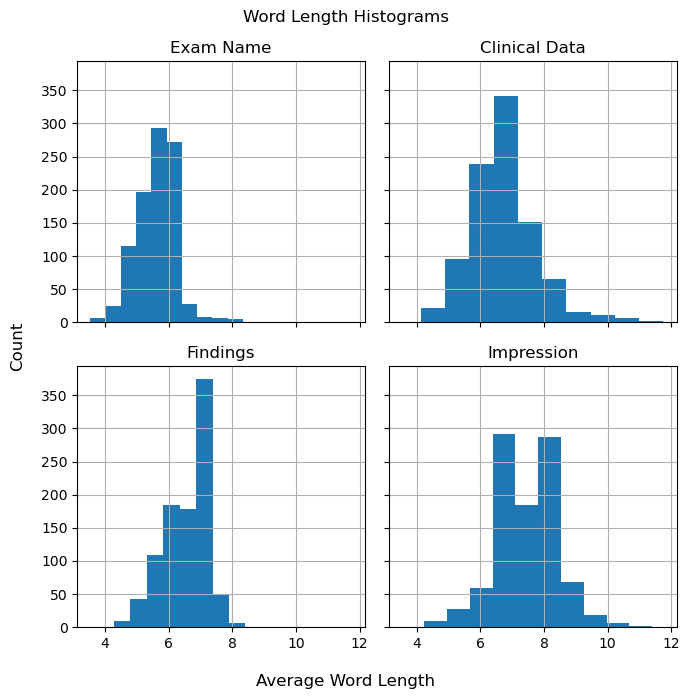

In [246]:
fig, axs = plt.subplots(2,2,figsize=(7,7),sharex=True, sharey=True)

data['ExamName'].str.split().apply(\
    lambda x : [len(i) for i in x]).map(\
    lambda x: np.mean(x)).hist(ax=axs[0,0])
axs[0, 0].set_title("Exam Name")

#must dropna here because 4 records are missing/NaN
data['clinicaldata'].dropna().str.split().apply(\
    lambda x : [len(i) for i in x]).map(\
    lambda x: np.mean(x)).hist(ax=axs[0,1])
axs[0, 1].set_title("Clinical Data")

data['findings'].str.split().apply(\
    lambda x : [len(i) for i in x]).map(\
    lambda x: np.mean(x)).hist(ax=axs[1,0])
axs[1, 0].set_title("Findings")

data['impression'].str.split().apply(\
    lambda x : [len(i) for i in x]).map(\
    lambda x: np.mean(x)).hist(ax=axs[1,1])
axs[1, 1].set_title("Impression")

fig.supxlabel('Average Word Length')
fig.supylabel('Count')
plt.suptitle('Word Length Histograms')
plt.tight_layout()

Most examples of exam name have words that are less than 7 words long with around 5-6 letters in the average word. Clinical data and findings both have an average of around 7 letters per word. Impression seems to have the most examples with longer average word lengths (>8), but since a significant number of impressions have less than 7 average letters in each word, the average word length of impression examples seems to be around 7. 

Additionally, the exam name and findings field seem to be favoring smaller average word lengths while clinical data and impressions seem to have a higher overall count of longer average word lengths.

Stopwords often add no information to the text data to be analyzed, but were included in our prior summary statistics. Removing stopwords can lead to greater insights on our data.

In [247]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

In [248]:
#Creating corpus for each section 

namecorpus=[]
mots = data['ExamName'].str.split()
mots = mots.values.tolist()
namecorpus = [word for i in mots for word in i]

findcorpus=[]
mots = data['findings'].str.split()
mots = mots.values.tolist()
findcorpus = [word for i in mots for word in i]

clincorpus=[]
mots = data['clinicaldata'].dropna().str.split()
mots = mots.values.tolist()
clincorpus = [word for i in mots for word in i]

impcorpus=[]
mots = data['impression'].str.split()
mots = mots.values.tolist()
impcorpus = [word for i in mots for word in i]

In [249]:
#Creating stopwords dictionary for each section

from collections import defaultdict


namedic=defaultdict(int)
for word in namecorpus:
    if word in stop:
        namedic[word]+=1

finddic=defaultdict(int)
for word in findcorpus:
    if word in stop:
        finddic[word]+=1

clindic=defaultdict(int)
for word in clincorpus:
    if word in stop:
        clindic[word]+=1

impdic=defaultdict(int)
for word in impcorpus:
    if word in stop:
        impdic[word]+=1

Now we can plot the most common stopwords and non stopwords in each section

In [250]:
from collections import Counter
import seaborn as sns

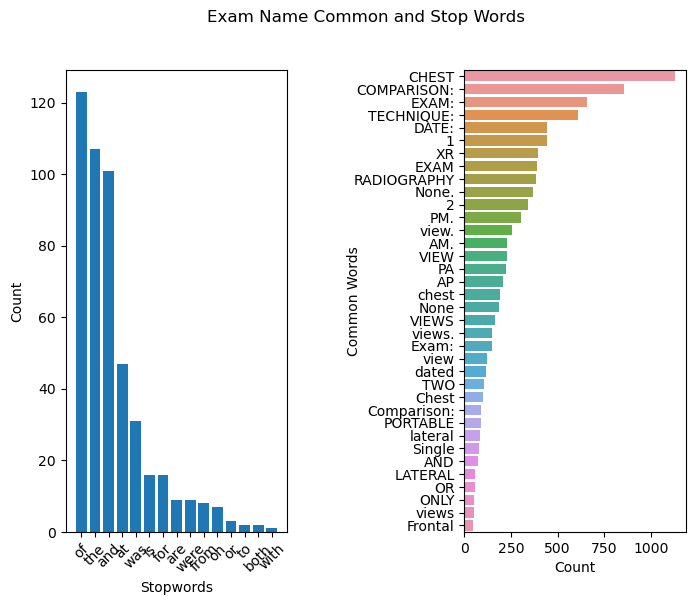

In [251]:
#Exam Name

fig, axs = plt.subplots(1,2,gridspec_kw={'width_ratios': [1,1],'wspace':.8},figsize=(8,6))

top = sorted(namedic.items(), key= lambda x:x[1],reverse=True)[:15] 
x,y=zip(*top)
axs[0].bar(x,y)
axs[0].set_xlabel('Stopwords')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

counter=Counter(namecorpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)


sns.barplot(x=y,y=x,ax=axs[1])
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Common Words',labelpad=-5)

plt.suptitle('Exam Name Common and Stop Words')
plt.show()

'Of, 'the, and 'and' are the three most common stopwords in the exam name field. 'Chest', 'comparison', and 'exam' are the three most common non-stopwords in the field.

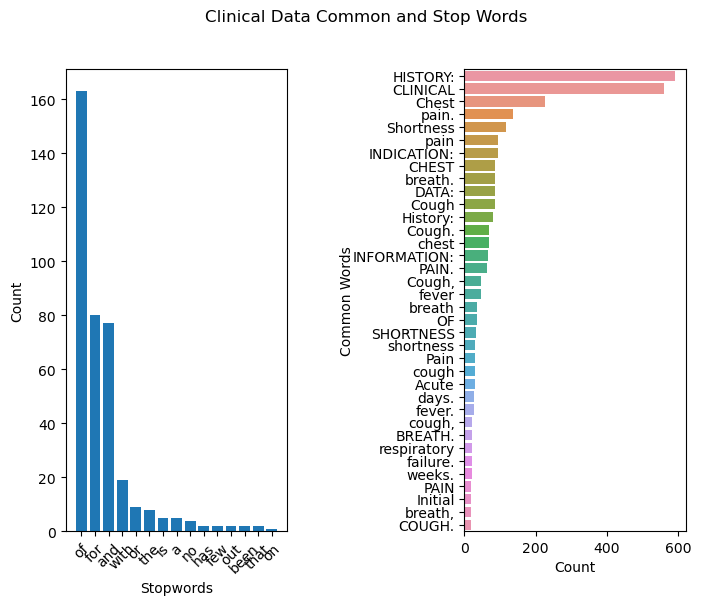

In [252]:
#Clinical data

fig, axs = plt.subplots(1,2,gridspec_kw={'width_ratios': [1,1],'wspace':.8},figsize=(8,6))

top = sorted(clindic.items(), key= lambda x:x[1],reverse=True)[:15] 
x,y=zip(*top)
axs[0].bar(x,y)
axs[0].set_xlabel('Stopwords')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

counter=Counter(clincorpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x,ax=axs[1])
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Common Words',labelpad=-1)

plt.suptitle('Clinical Data Common and Stop Words')
plt.show()

'Of, 'for, and 'and' are the three most common stopwords in the exam name field. 'History', 'clinical', and 'chest' are the three most common non-stopwords in the field. History likely reflects the nature of the field, as it includes the patient's past medical history.

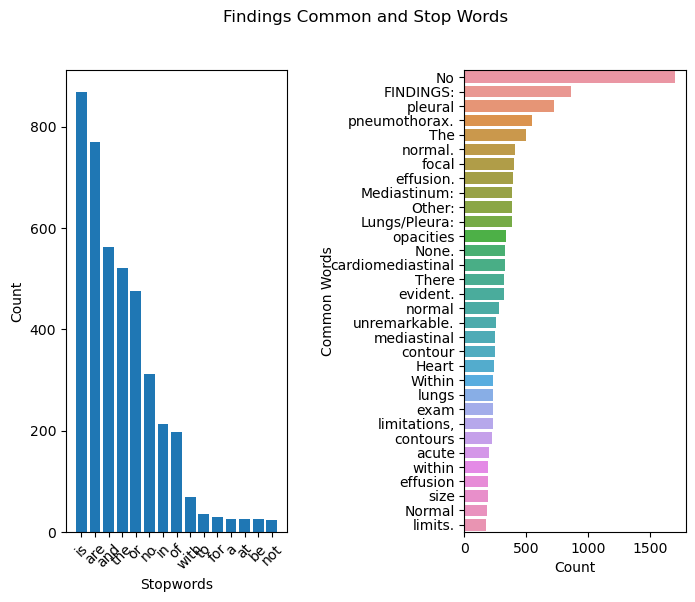

In [253]:
#Findings

fig, axs = plt.subplots(1,2,gridspec_kw={'width_ratios': [1,1],'wspace':.8},figsize=(8,6))

top = sorted(finddic.items(), key= lambda x:x[1],reverse=True)[:15] 
x,y=zip(*top)
axs[0].bar(x,y)
axs[0].set_xlabel('Stopwords')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

counter=Counter(findcorpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x,ax=axs[1])
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Common Words',labelpad=-3)

plt.suptitle('Findings Common and Stop Words')
plt.show()

'Is, 'are, and 'and' are the three most common stopwords in the exam name field. 'No', 'findings:', and 'pleural' are the three most common non-stopwords in the field. 'No' probably reflects the lack of a certain finding in the patient's radiology images.

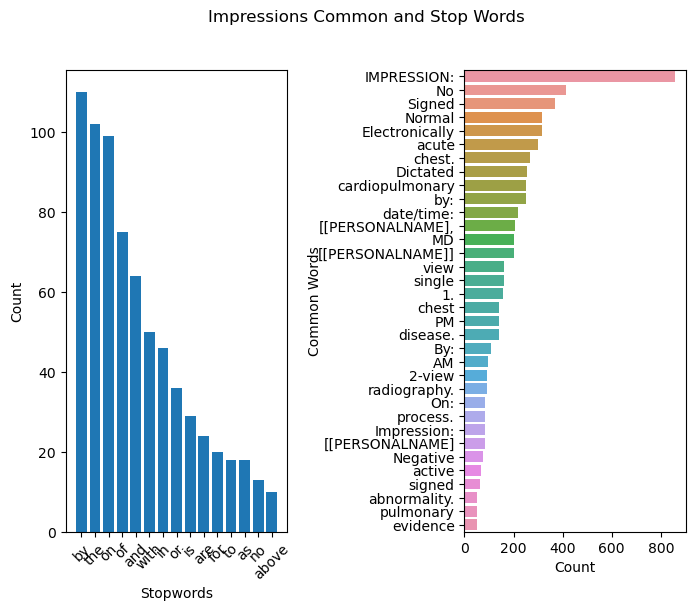

In [254]:
#Impressions

fig, axs = plt.subplots(1,2,gridspec_kw={'width_ratios': [1,1],'wspace':.8},figsize=(8,6))

top = sorted(impdic.items(), key= lambda x:x[1],reverse=True)[:15] 
x,y=zip(*top)
axs[0].bar(x,y)
axs[0].set_xlabel('Stopwords')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

counter=Counter(impcorpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x,ax=axs[1])
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Common Words',labelpad=-3)

plt.suptitle('Impressions Common and Stop Words')
plt.show()

'By, 'the, and 'on' are the three most common stopwords in the exam name field. 'Impression', 'No', and 'Signed' are the three most common non-stopwords in the field. The word 'impression' is likely the field header, while signed represents the signature of the medical professional providing the impression.

Now we will perform n-gram exploration

In [255]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [256]:
def get_top_ngram(corpus,n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit((corpus))
    bag_of_words = vec.transform((corpus))
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
            for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [257]:
examname = data['ExamName']
clindata = data['clinicaldata'].dropna()
findings = data['findings']
impression = data['impression']

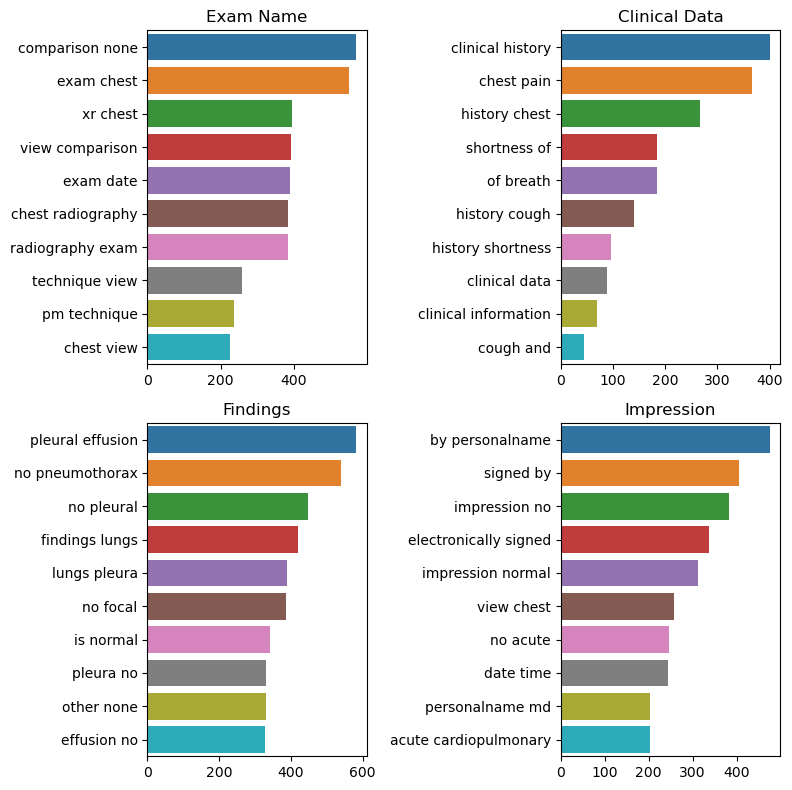

In [258]:
fig, axes = plt.subplots(2,2)

axes[0,0].set_title('Exam Name')
axes[0,1].set_title('Clinical Data')
axes[1,0].set_title('Findings')
axes[1,1].set_title('Impression')

#Exam Name
top_n_bigrams=get_top_ngram(examname,2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(ax=axes[0,0],x=y,y=x)

#Clinical Data
top_n_bigrams=get_top_ngram(clindata,2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(ax=axes[0,1],x=y,y=x)

#Findings
top_n_bigrams=get_top_ngram(findings,2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(ax=axes[1,0],x=y,y=x)

#Impression
top_n_bigrams=get_top_ngram(impression,2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(ax=axes[1,1],x=y,y=x)

fig.set_figheight(8)
fig.set_figwidth(8)
fig.tight_layout()
plt.show()

These bigrams show which 2 words are most paired together in each of the four report sections. The exam name bigrams focus on the type of exam conducted. The clinical data bigrams focus on the medical history of the patient. The findings section bigrams show various pathological findings (and the lack thereof) found in radiological imaging. Finally, the impression section bigrams include signatures and redacted personal names, showing the final medical determination provided by the medical professional.

Moving onto topic modeling exploration with pyLDAvis.

In [259]:
import nltk
from nltk import word_tokenize, PorterStemmer, WordNetLemmatizer, punkt, wordnet
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ambro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ambro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ambro\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [260]:
#Preprocessing by tokenizing, lemmatizing, and removing stopwords

def preprocess(section):
    corpus= []
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for chunk in section:
        words=[w for w in word_tokenize(chunk) if (w not in stop)]
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        corpus.append(words)
    return corpus

exnamecorpus=preprocess(examname)
clincorpus =preprocess(clindata)
findcorpus=preprocess(findings)
impcorpus=preprocess(impression)

In [261]:
#Creating a bag of words for each section

import gensim

exnamedic=gensim.corpora.Dictionary(exnamecorpus)
bow_exnamecorpus = [exnamedic.doc2bow(doc) for doc in exnamecorpus]

clindic=gensim.corpora.Dictionary(clincorpus)
bow_clincorpus = [clindic.doc2bow(doc) for doc in clincorpus]

finddic=gensim.corpora.Dictionary(findcorpus)
bow_findcorpus = [finddic.doc2bow(doc) for doc in findcorpus]

impdic=gensim.corpora.Dictionary(impcorpus)
bow_impcorpus = [impdic.doc2bow(doc) for doc in impcorpus]

In [262]:
#Exam Name

exnamelda_model = gensim.models.LdaMulticore(bow_exnamecorpus, 
num_topics = 4, 
id2word = exnamedic,                                    
passes = 10,
workers = 2)
exnamelda_model.show_topics()

[(0,
  '0.127*"Exam" + 0.088*"Comparison" + 0.086*"CHEST" + 0.052*"None" + 0.038*"VIEW" + 0.033*"Chest" + 0.028*"radiograph" + 0.026*"ONLY" + 0.023*"Yesterday" + 0.021*"chest"'),
 (1,
  '0.076*"COMPARISON" + 0.054*"CHEST" + 0.050*"chest" + 0.044*"DATE" + 0.035*"Chest" + 0.034*"Single" + 0.034*"TECHNIQUE" + 0.033*"view" + 0.030*"VIEW" + 0.028*"None"'),
 (2,
  '0.172*"CHEST" + 0.104*"COMPARISON" + 0.092*"VIEWS" + 0.069*"dated" + 0.069*"TWO" + 0.064*"None" + 0.057*"VIEW" + 0.048*"EXAM" + 0.016*"PORTABLE" + 0.012*"VWS"'),
 (3,
  '0.144*"EXAM" + 0.105*"CHEST" + 0.084*"TECHNIQUE" + 0.084*"COMPARISON" + 0.078*"view" + 0.065*"DATE" + 0.060*"RADIOGRAPHY" + 0.055*"None" + 0.017*"chest" + 0.011*"VIEW"')]

In [263]:
#Clinical Data

clinlda_model = gensim.models.LdaMulticore(bow_clincorpus, 
num_topics = 4, 
id2word = clindic,                                    
passes = 10,
workers = 2)
clinlda_model.show_topics()

[(0,
  '0.169*"Cough" + 0.122*"HISTORY" + 0.118*"CLINICAL" + 0.079*"fever" + 0.040*"INDICATION" + 0.039*"cough" + 0.021*"day" + 0.020*"DATA" + 0.019*"congestion" + 0.013*"R05"'),
 (1,
  '0.159*"HISTORY" + 0.150*"CLINICAL" + 0.140*"Chest" + 0.122*"pain" + 0.079*"breath" + 0.073*"Shortness" + 0.037*"DATA" + 0.022*"Pain" + 0.018*"cough" + 0.016*"INDICATION"'),
 (2,
  '0.103*"HISTORY" + 0.085*"CLINICAL" + 0.080*"chest" + 0.060*"pain" + 0.046*"INFORMATION" + 0.033*"INDICATION" + 0.033*"week" + 0.032*"Cough" + 0.032*"Acute" + 0.028*"failure"'),
 (3,
  '0.161*"HISTORY" + 0.150*"CLINICAL" + 0.108*"CHEST" + 0.104*"PAIN" + 0.089*"History" + 0.041*"SHORTNESS" + 0.041*"BREATH" + 0.037*"COUGH" + 0.014*"DYSPNEA" + 0.007*"S/P"')]

In [264]:
#Findings

findlda_model = gensim.models.LdaMulticore(bow_findcorpus, 
num_topics = 4, 
id2word = finddic,                                    
passes = 10,
workers = 2)
findlda_model.show_topics()

[(0,
  '0.062*"contour" + 0.057*"FINDINGS" + 0.053*"effusion" + 0.052*"pneumothorax" + 0.052*"pleural" + 0.051*"Mediastinum" + 0.051*"Other" + 0.051*"Lungs/Pleura" + 0.049*"focal" + 0.048*"opacity"'),
 (1,
  '0.032*"tube" + 0.029*"FINDINGS" + 0.023*"pneumothorax" + 0.022*"pleural" + 0.021*"The" + 0.019*"effusion" + 0.017*"There" + 0.017*"acute" + 0.016*"tip" + 0.015*"normal"'),
 (2,
  '0.059*"FINDINGS" + 0.047*"Normal" + 0.047*"pleural" + 0.046*"bone" + 0.045*"abnormality" + 0.044*"pneumothorax" + 0.044*"lung" + 0.042*"effusion" + 0.041*"adenopathy" + 0.038*"normal"'),
 (3,
  '0.064*"The" + 0.053*"normal" + 0.045*"There" + 0.040*"FINDINGS" + 0.036*"size" + 0.035*"effusion" + 0.031*"lung" + 0.031*"pleural" + 0.030*"clear" + 0.028*"silhouette"')]

In [265]:
#Impression

implda_model = gensim.models.LdaMulticore(bow_impcorpus, 
num_topics = 4, 
id2word = impdic,                                    
passes = 10,
workers = 2)
implda_model.show_topics()

[(0,
  '0.109*"PERSONALNAME" + 0.107*"IMPRESSION" + 0.085*"acute" + 0.078*"Signed" + 0.064*"Electronically" + 0.064*"cardiopulmonary" + 0.031*"disease" + 0.027*"process" + 0.026*"chest" + 0.023*"abnormality"'),
 (1,
  '0.075*"IMPRESSION" + 0.055*"PERSONALNAME" + 0.044*"Signed" + 0.036*"Electronically" + 0.030*"disease" + 0.020*"active" + 0.013*"opacity" + 0.012*"pleural" + 0.012*"effusion" + 0.012*"cardiopulmonary"'),
 (2,
  '0.225*"Dictated" + 0.189*"date/time" + 0.021*"PERSONALNAME" + 0.014*"IMPRESSION" + 0.011*"finding" + 0.011*"Electronically" + 0.010*"The" + 0.009*"Dictatedtime" + 0.008*"reviewed" + 0.008*"Impression"'),
 (3,
  '0.173*"chest" + 0.172*"Normal" + 0.163*"IMPRESSION" + 0.088*"view" + 0.086*"single" + 0.050*"radiography" + 0.050*"2-view" + 0.008*"x-ray" + 0.004*"PHONE" + 0.003*"examination"')]

In [305]:
import pyLDAvis
import pyLDAvis.gensim_models
from importlib import reload
from IPython.core.display import HTML

In [306]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [312]:
#Exam Name

%matplotlib inline
vis = pyLDAvis.gensim_models.prepare(exnamelda_model, bow_exnamecorpus, exnamedic)
pyLDAvis.enable_notebook(local=True) 
pyLDAvis.save_html(vis, 'lda_result.html')
HTML('lda_result.html')

In [311]:
#Clinical Data

%matplotlib inline
vis = pyLDAvis.gensim_models.prepare(clinlda_model, bow_clincorpus, clindic)
pyLDAvis.enable_notebook(local=True) 
pyLDAvis.save_html(vis, 'lda_result.html')
HTML('lda_result.html')

In [310]:
#Findings

%matplotlib inline
vis = pyLDAvis.gensim_models.prepare(findlda_model, bow_findcorpus, finddic)
pyLDAvis.enable_notebook(local=True) 
pyLDAvis.save_html(vis, 'lda_result.html')
HTML('lda_result.html')

In [309]:
#Impressions

%matplotlib inline
vis = pyLDAvis.gensim_models.prepare(implda_model, bow_impcorpus, impdic)
pyLDAvis.enable_notebook(local=True) 
pyLDAvis.save_html(vis, 'lda_result.html')
HTML('lda_result.html')

The four LDA plots show different topic distributions for each section. The larger the circle, the greater the representation of the data. The space between the circles reflect the similarity between the topics. When the circles overlap, there is a high level of similarity between the different topics. 

The topics are based on the words in the fields as well as the frequency of them. Hovering over the different words will temporarily change the topic sizes to demonstrate which topics are most affected by the words and to what extent. Knowing the similarity between the entries in each field can assist with classification as the features characterizing the a large percentage of examples in the field can be separated from features that do not.

Wordclouds

In [273]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

In [274]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

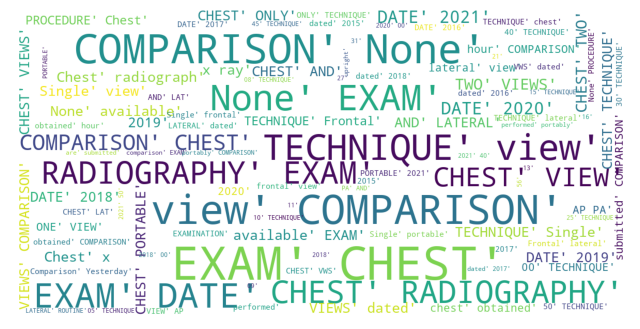

In [275]:
#Exam Name

show_wordcloud(exnamecorpus)

Exam Name's most common/significant words include 'exam', 'comparison', and 'radiography'. These words highlight the type of radiology imagery that will be conducted for the patient.

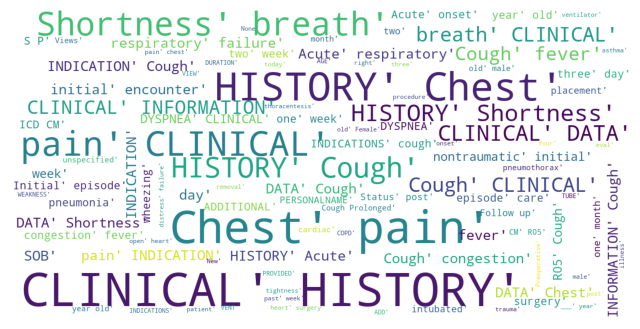

In [276]:
#Clinical Data

show_wordcloud(clincorpus)

Clinical Data's most common/significant words include 'clinical', 'history', 'shortness', 'chest', 'pain', etc. These words demonstrate the varied types of medical histories bringing patients to pursue radiological imagery.

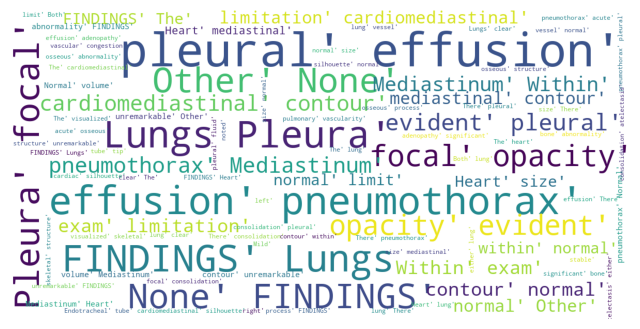

In [277]:
#Findings Data

show_wordcloud(findcorpus)

Findings' most common/significant words include 'pleural', 'lungs', 'findings', 'effusion', etc. These words reflect what medical information is found in the radiological imaging.

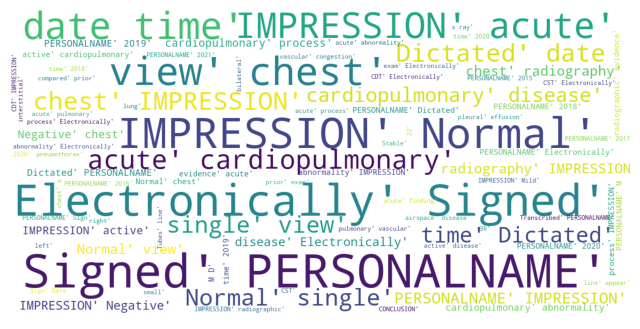

In [278]:
#Impressions

show_wordcloud(impcorpus)

Impression's most common/significant words include 'Impression','Normal','Electronically','Signed','Personalname','acute',etc. This is the medical determination that is also signed by a medical professional.

Text Complexity Exploration

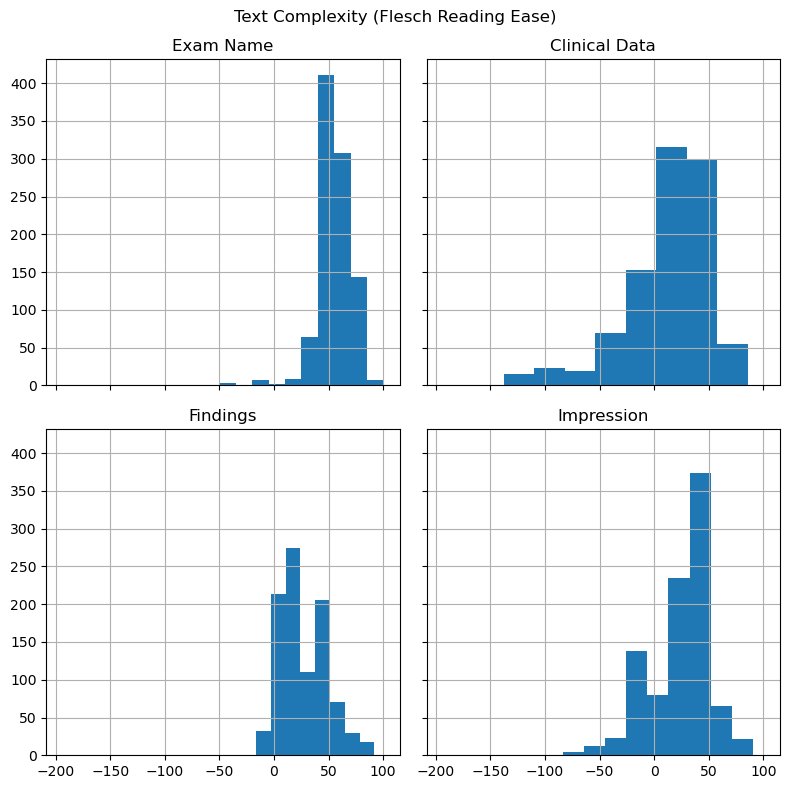

In [279]:
from textstat import flesch_reading_ease, automated_readability_index

fig, axes = plt.subplots(2,2,sharex='all', sharey='all')

axes[0,0].set_title('Exam Name')
axes[0,1].set_title('Clinical Data')
axes[1,0].set_title('Findings')
axes[1,1].set_title('Impression')

#Exam Name
examname.apply(lambda x : flesch_reading_ease(x)).hist(ax=axes[0,0])

#Clinical Data
clindata.apply(lambda x : flesch_reading_ease(x)).hist(ax=axes[0,1])

#Findings
findings.apply(lambda x : flesch_reading_ease(x)).hist(ax=axes[1,0])

#Impression
impression.apply(lambda x : flesch_reading_ease(x)).hist(ax=axes[1,1])

fig.set_figheight(8)
fig.set_figwidth(8)
plt.suptitle('Text Complexity (Flesch Reading Ease)')
fig.tight_layout()
plt.show()

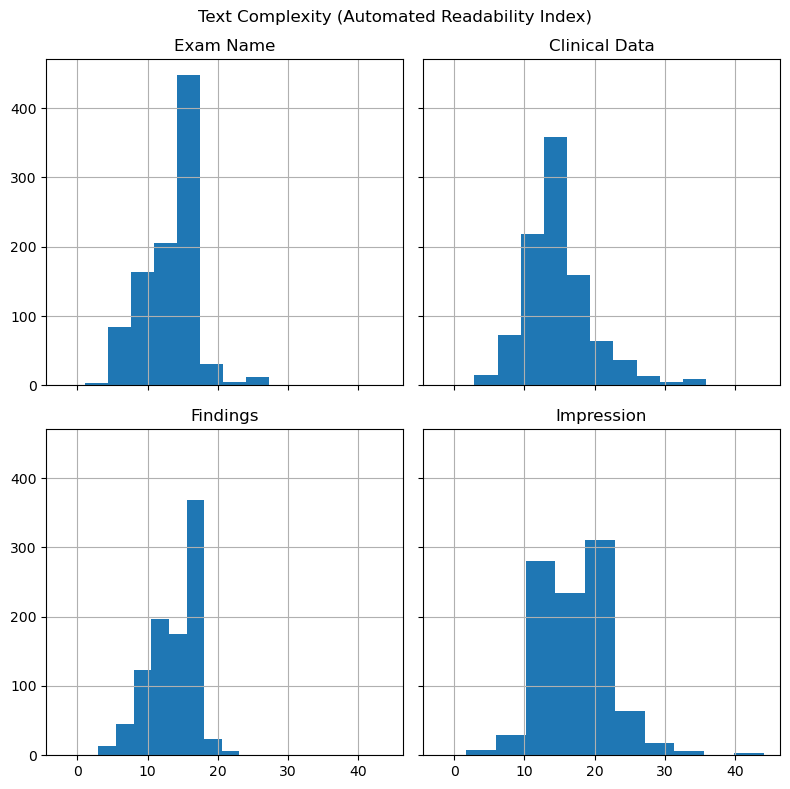

In [280]:
fig, axes = plt.subplots(2,2,sharex='all', sharey='all')

axes[0,0].set_title('Exam Name')
axes[0,1].set_title('Clinical Data')
axes[1,0].set_title('Findings')
axes[1,1].set_title('Impression')

#Exam Name
examname.apply(lambda x : automated_readability_index(x)).hist(ax=axes[0,0])

#Clinical Data
clindata.apply(lambda x : automated_readability_index(x)).hist(ax=axes[0,1])

#Findings
findings.apply(lambda x : automated_readability_index(x)).hist(ax=axes[1,0])

#Impression
impression.apply(lambda x : automated_readability_index(x)).hist(ax=axes[1,1])

fig.set_figheight(8)
fig.set_figwidth(8)
plt.suptitle('Text Complexity (Automated Readability Index)')
fig.tight_layout()
plt.show()

Using both readability indexes, Clinical Data and Impressions have a greater number of difficult text than exam name and findings. Exam Name seems to be the easiest to read, which makes sense because it is very general information and lacks as much medical terminology as other sections.

In [281]:
%store exnamecorpus
%store clincorpus
%store findcorpus
%store impcorpus

Stored 'exnamecorpus' (list)
Stored 'clincorpus' (list)
Stored 'findcorpus' (list)
Stored 'impcorpus' (list)


In [282]:
%store -z